In [637]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA

data = pd.read_csv('data_3D_printer.csv')

In [638]:
data.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


In [639]:
data.shape

(50, 12)

In [640]:
data.index

RangeIndex(start=0, stop=50, step=1)

In [641]:
columns = list(data.columns)
columns

['layer_height',
 'wall_thickness',
 'infill_density',
 'infill_pattern',
 'nozzle_temperature',
 'bed_temperature',
 'print_speed',
 'material',
 'fan_speed',
 'roughness',
 'tension_strenght',
 'elongation']

In [642]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tension_strenght    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


In [643]:
cats = list(data.select_dtypes(include=['object']).columns)
print(f'categorical variables: {cats}')

categorical variables: ['infill_pattern', 'material']


In [644]:
nums = list(data.select_dtypes(exclude=['object']).columns)
print(f'numerical variables: {nums}')

numerical variables: ['layer_height', 'wall_thickness', 'infill_density', 'nozzle_temperature', 'bed_temperature', 'print_speed', 'fan_speed', 'roughness', 'tension_strenght', 'elongation']


In [645]:
data.nunique(axis=0)

layer_height           5
wall_thickness        10
infill_density         9
infill_pattern         2
nozzle_temperature     9
bed_temperature        5
print_speed            3
material               2
fan_speed              5
roughness             44
tension_strenght      26
elongation            27
dtype: int64

In [646]:
print(f'categorical variables: {cats}')
print(f'numerical variables: {nums}')

'''cats.extend(['layer_height','bed_temperature','print_speed','fan_speed'])
nums.remove('bed_temperature')
nums.remove('layer_height')
nums.remove('print_speed')
nums.remove('fan_speed')

print(f'categorical variables: {cats}')
print(f'numerical variables: {nums}')'''

'''cats.extend(['nozzle_temperature','infill_density','wall_thickness','layer_height','bed_temperature','print_speed','fan_speed'])
nums.remove('nozzle_temperature')
nums.remove('infill_density')
nums.remove('wall_thickness')
nums.remove('bed_temperature')
nums.remove('layer_height')
nums.remove('print_speed')
nums.remove('fan_speed')

print(f'categorical variables: {cats}')
print(f'numerical variables: {nums}')'''

categorical variables: ['infill_pattern', 'material']
numerical variables: ['layer_height', 'wall_thickness', 'infill_density', 'nozzle_temperature', 'bed_temperature', 'print_speed', 'fan_speed', 'roughness', 'tension_strenght', 'elongation']


"cats.extend(['nozzle_temperature','infill_density','wall_thickness','layer_height','bed_temperature','print_speed','fan_speed'])\nnums.remove('nozzle_temperature')\nnums.remove('infill_density')\nnums.remove('wall_thickness')\nnums.remove('bed_temperature')\nnums.remove('layer_height')\nnums.remove('print_speed')\nnums.remove('fan_speed')\n\nprint(f'categorical variables: {cats}')\nprint(f'numerical variables: {nums}')"

In [647]:
# lets check for missing data in the dataframe
missing_data = data.isna()
missing_data.head()


,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [648]:
missing_data_columns = data.isna().sum()
missing_data_columns

layer_height          0
wall_thickness        0
infill_density        0
infill_pattern        0
nozzle_temperature    0
bed_temperature       0
print_speed           0
material              0
fan_speed             0
roughness             0
tension_strenght      0
elongation            0
dtype: int64

In [649]:
missing_data_total = data.isna().sum().sum()
missing_data_total

0

In [650]:
data.isnull().head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [651]:
data.isnull().sum()


layer_height          0
wall_thickness        0
infill_density        0
infill_pattern        0
nozzle_temperature    0
bed_temperature       0
print_speed           0
material              0
fan_speed             0
roughness             0
tension_strenght      0
elongation            0
dtype: int64

In [652]:
data.isnull().sum().sum()

0

There is no missing data in the dataset.

Now that we know there is no missing data we can sort the data into some prenamed numpy arrays.

In [653]:
# find total duplicate entries and drop them if any
print(f'totalduplicaterows:{data.duplicated().sum()}') 
#dropduplicaterowsifany 
data=data[~data.duplicated()] 
data.shape

totalduplicaterows:0


(50, 12)

There are no duplicates in the data

In [654]:
data.dtypes

layer_height          float64
wall_thickness          int64
infill_density          int64
infill_pattern         object
nozzle_temperature      int64
bed_temperature         int64
print_speed             int64
material               object
fan_speed               int64
roughness               int64
tension_strenght        int64
elongation            float64
dtype: object

In [655]:
data.describe()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.0000,50.000000,50.000000,50.000000,50.000000
mean,0.106000,5.220000,53.40000,221.500000,70.000000,64.0000,50.000000,170.580000,20.080000,1.672000
std,0.064397,2.922747,25.36348,14.820353,7.142857,29.6923,35.714286,99.034129,8.925634,0.788188
min,0.020000,1.000000,10.00000,200.000000,60.000000,40.0000,0.000000,21.000000,4.000000,0.400000
25%,0.060000,3.000000,40.00000,210.000000,65.000000,40.0000,25.000000,92.000000,12.000000,1.100000
50%,0.100000,5.000000,50.00000,220.000000,70.000000,60.0000,50.000000,165.500000,19.000000,1.550000
75%,0.150000,7.000000,80.00000,230.000000,75.000000,60.0000,75.000000,239.250000,27.000000,2.175000
max,0.200000,10.000000,90.00000,250.000000,80.000000,120.0000,100.000000,368.000000,37.000000,3.300000


In [656]:
df = pd.concat((data[cats], data[nums]), axis=1)
df.head()

,infill_pattern,material,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
0,grid,abs,0.02,8,90,220,60,40,0,25,18,1.2
1,honeycomb,abs,0.02,7,90,225,65,40,25,32,16,1.4
2,grid,abs,0.02,1,80,230,70,40,50,40,8,0.8
3,honeycomb,abs,0.02,4,70,240,75,40,75,68,10,0.5
4,grid,abs,0.02,6,90,250,80,40,100,92,5,0.7


In [657]:
num_rows, num_cols = df.shape
print('number of entries: ',num_rows)
print('number of features: ',num_cols)

number of entries:  50
number of features:  12


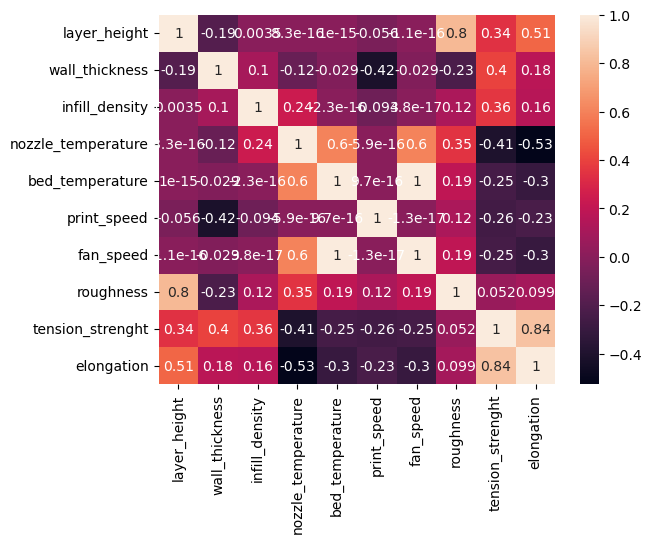

In [658]:
hm1 = sns.heatmap(df[nums].corr(), annot=True)

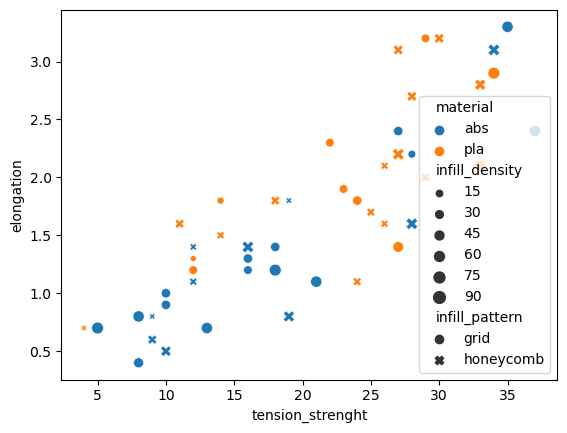

In [659]:
sp1 = sns.scatterplot(data=df, x='tension_strenght', y='elongation', hue='material', style = 'infill_pattern', size = 'infill_density')

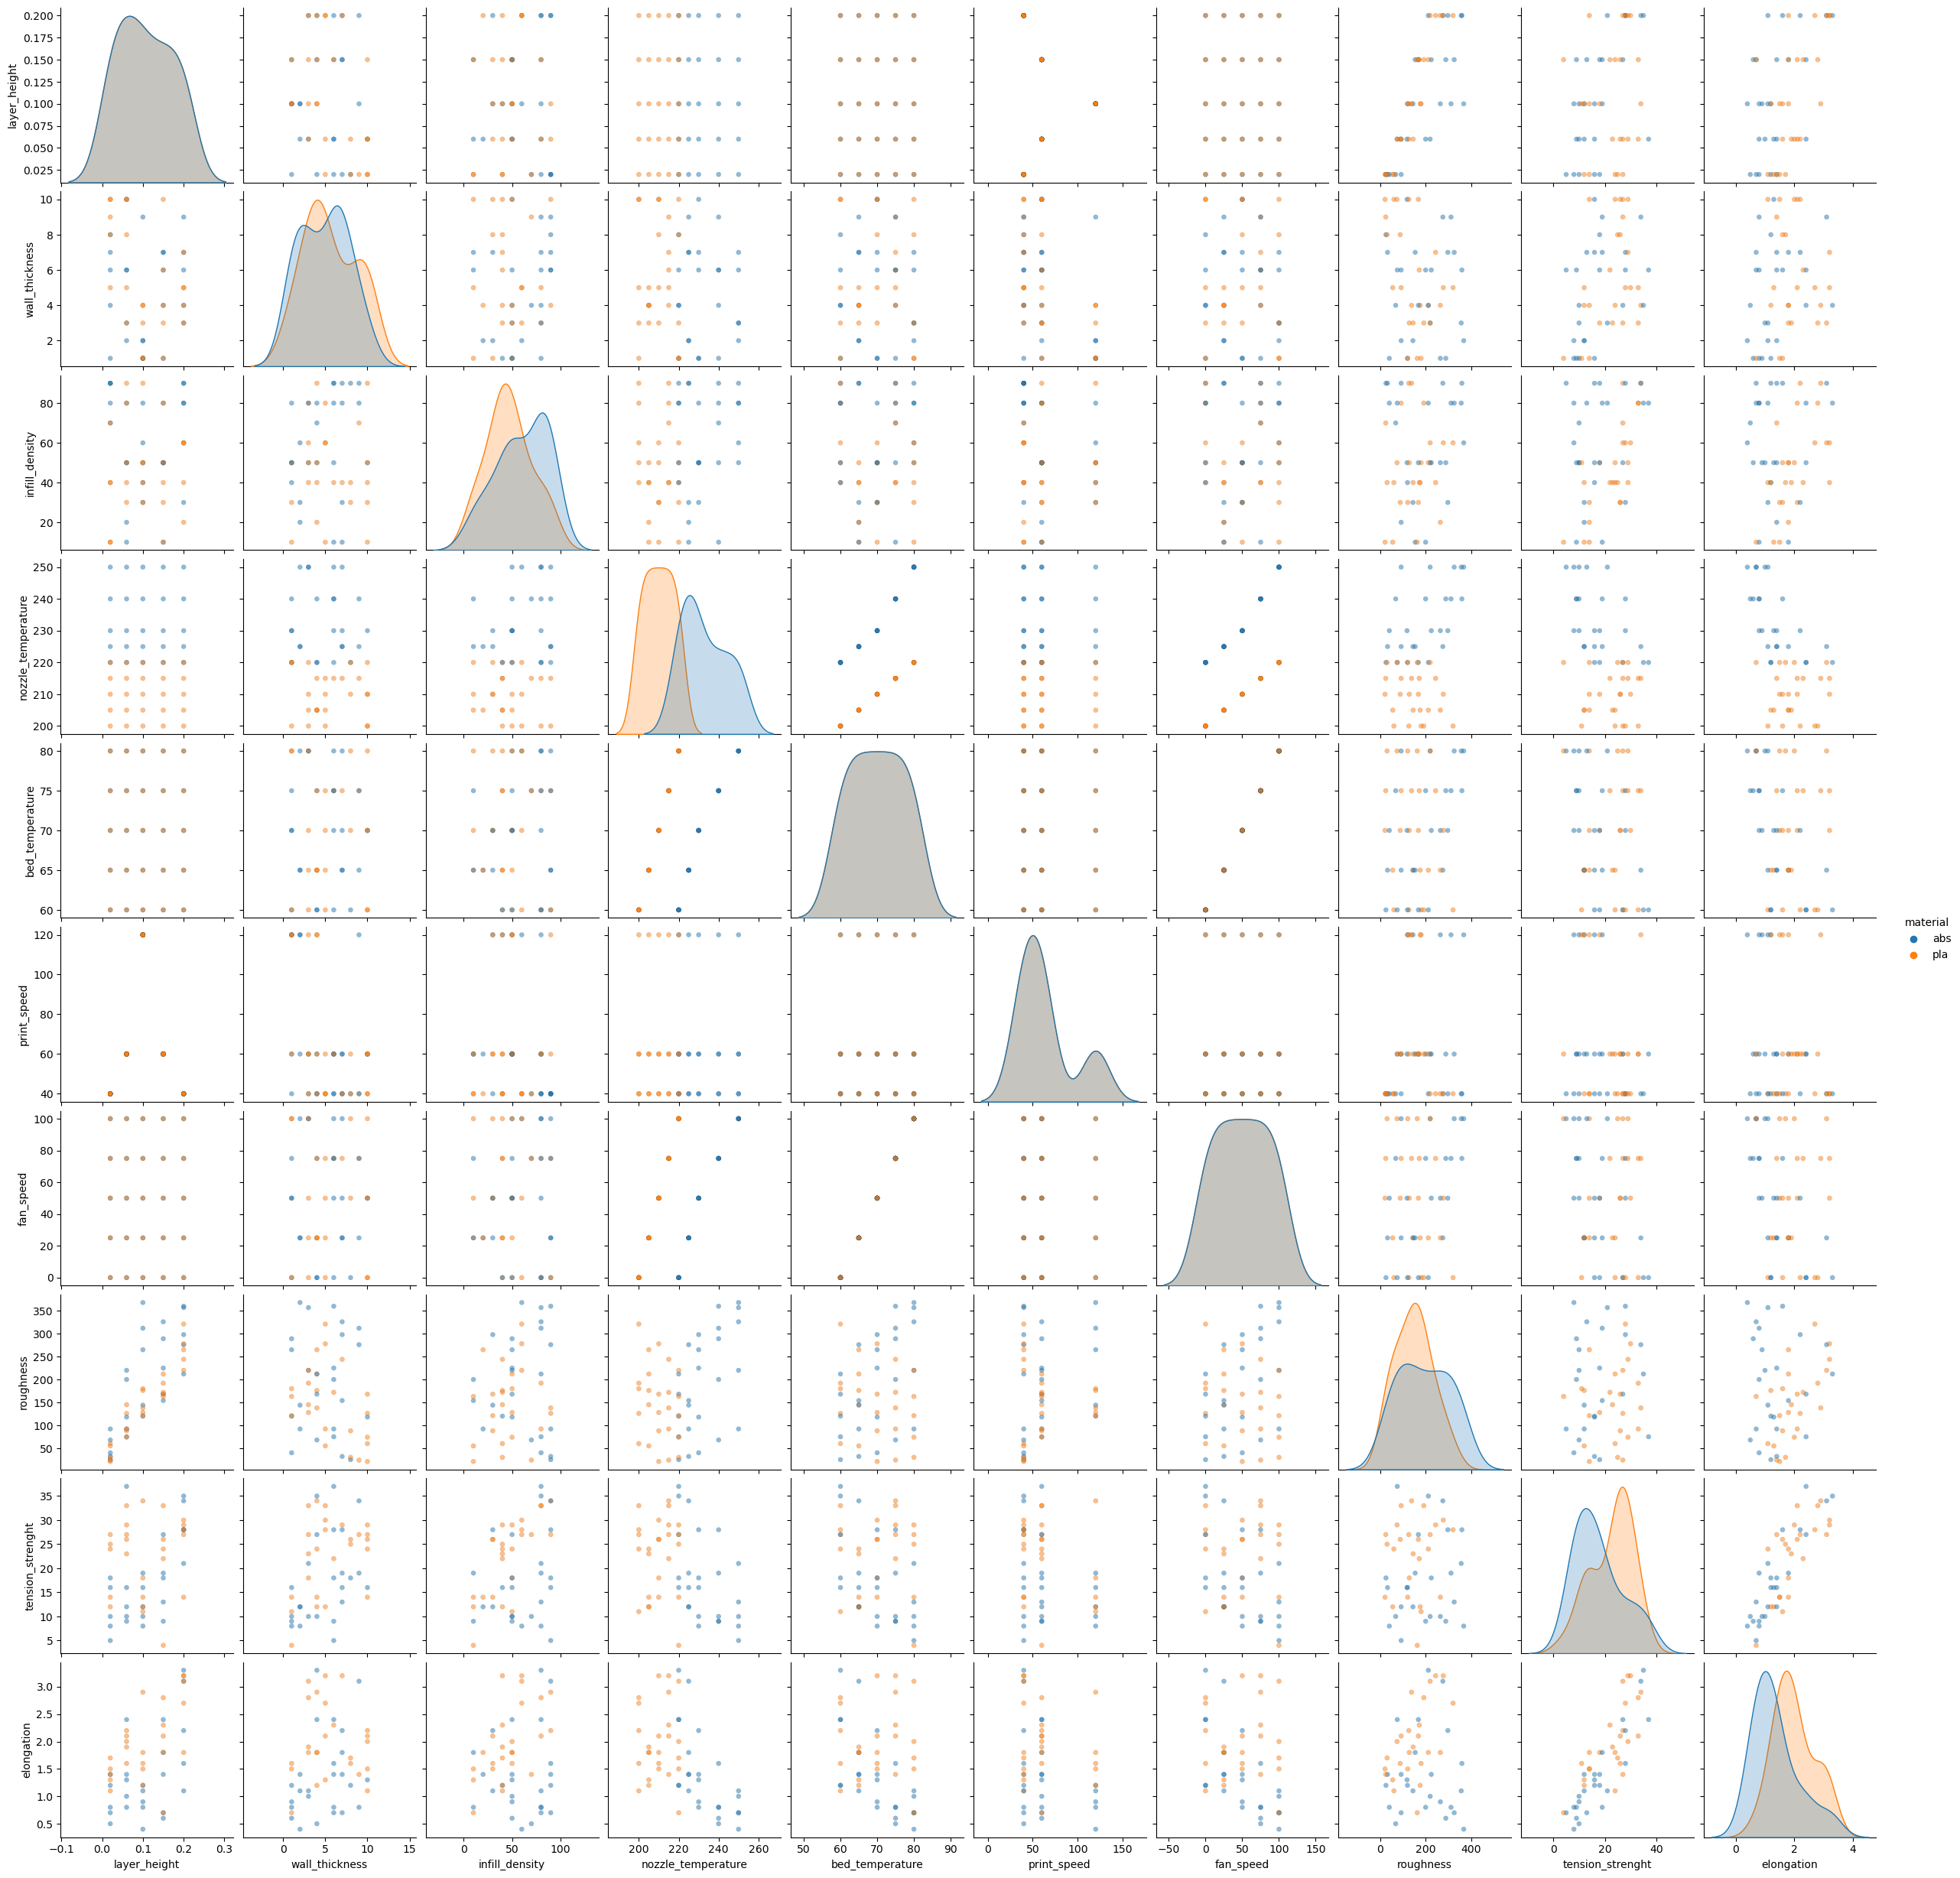

In [660]:
pp1 = sns.pairplot(data=df, vars = df[nums], diag_kind='kde', hue ='material', 
                   plot_kws=dict(s=20, edgecolor="k", linewidth=0.1, alpha=0.5), diag_kws=dict(fill=True))

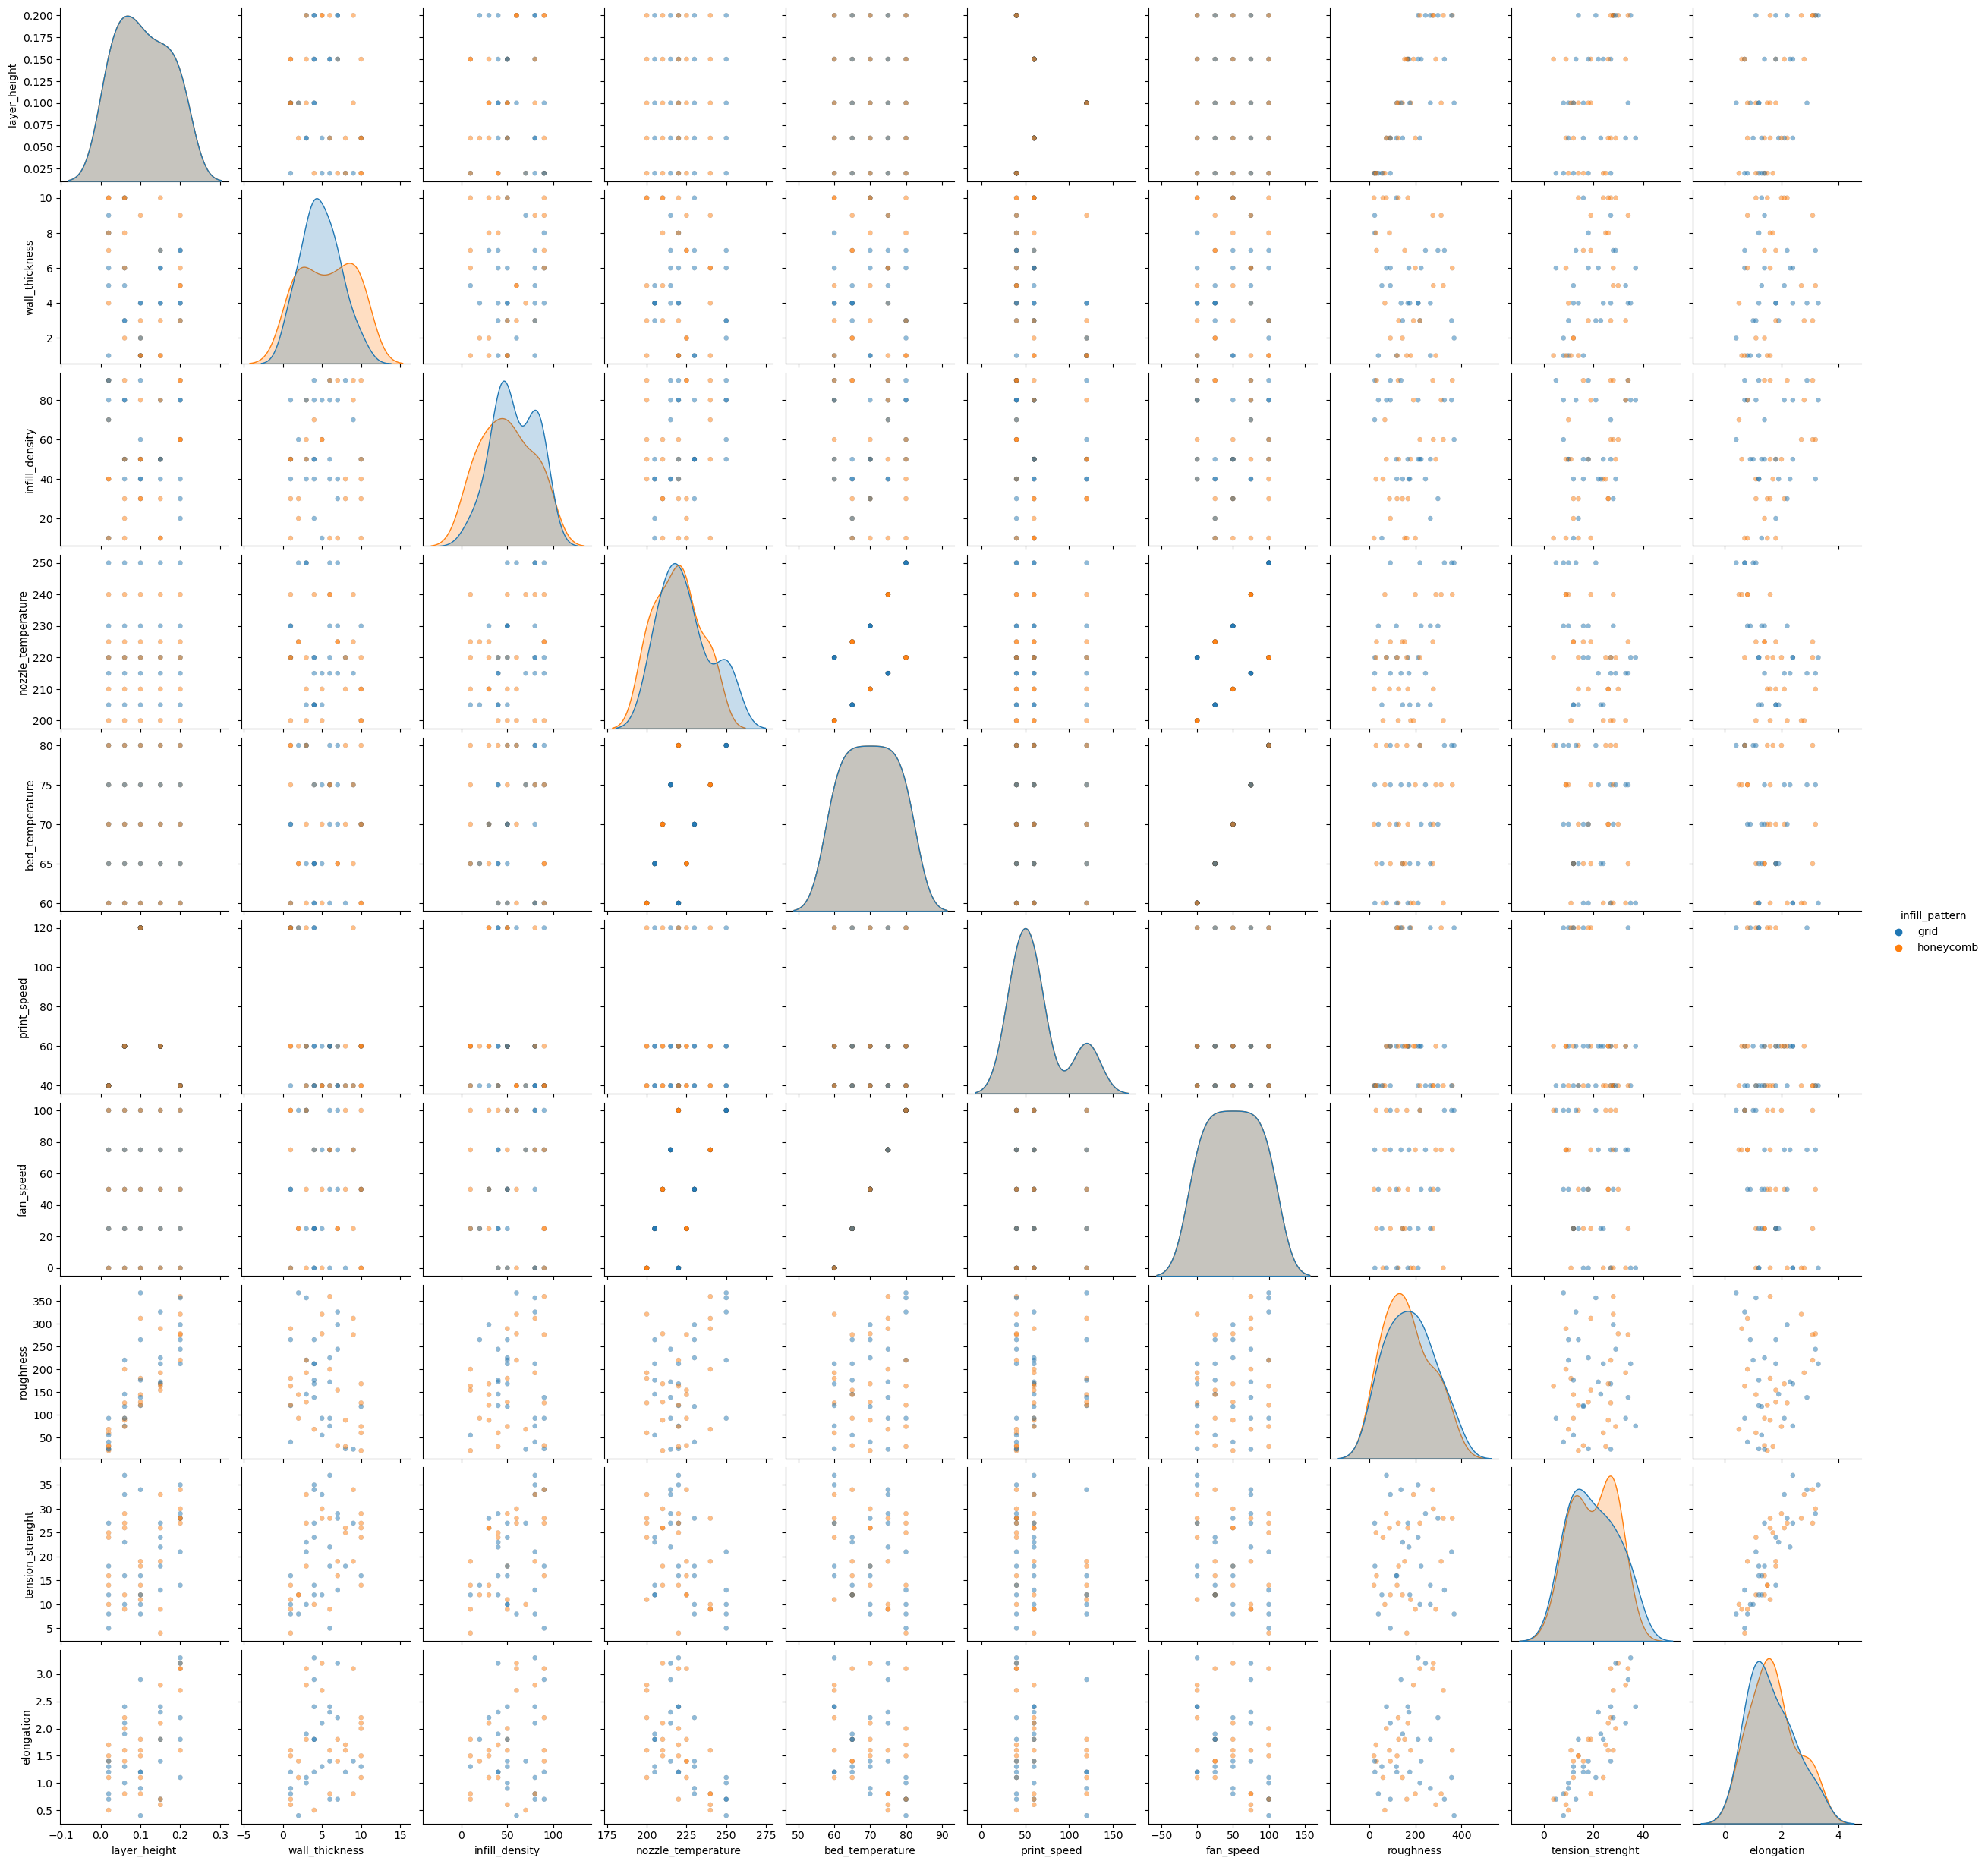

In [661]:
pp2 = sns.pairplot(data=df, vars = df[nums], diag_kind='kde', hue ='infill_pattern', 
             plot_kws=dict(s=20, edgecolor="k", linewidth=0.1, alpha=0.5), diag_kws=dict(fill=True))

In [662]:
df2 = df[nums].copy()
df2.head()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,220,60,40,0,25,18,1.2
1,0.02,7,90,225,65,40,25,32,16,1.4
2,0.02,1,80,230,70,40,50,40,8,0.8
3,0.02,4,70,240,75,40,75,68,10,0.5
4,0.02,6,90,250,80,40,100,92,5,0.7


In [663]:
df2['print_speed'] = df.print_speed
df2.head()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,220,60,40,0,25,18,1.2
1,0.02,7,90,225,65,40,25,32,16,1.4
2,0.02,1,80,230,70,40,50,40,8,0.8
3,0.02,4,70,240,75,40,75,68,10,0.5
4,0.02,6,90,250,80,40,100,92,5,0.7


<Axes: >

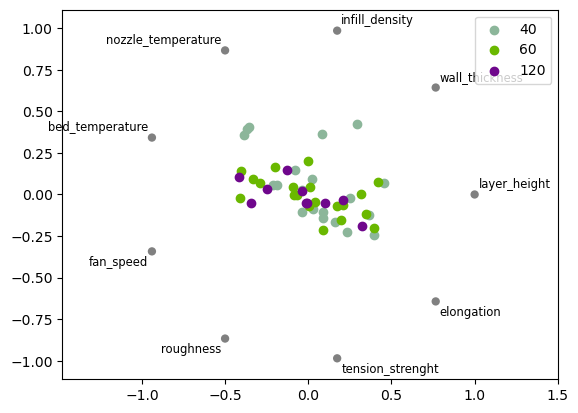

In [664]:
pd.plotting.radviz(df2, 'print_speed')

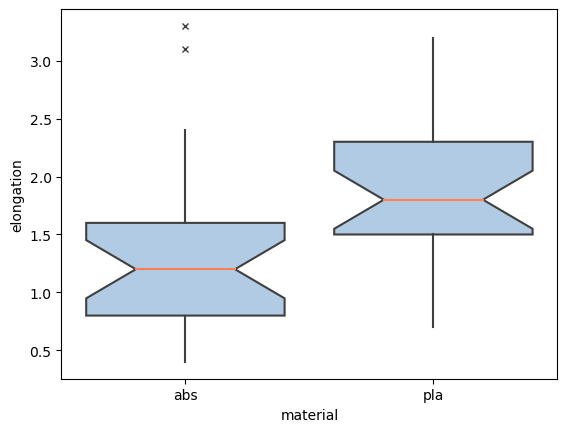

In [665]:
bp1 = sns.boxplot(data=df, x= 'material', y='elongation', 
                  notch=True, showcaps=False, flierprops={"marker": "x"},
                  boxprops={"facecolor": (.4, .6, .8, .5)},
                  medianprops={"color": "coral"}
                 )

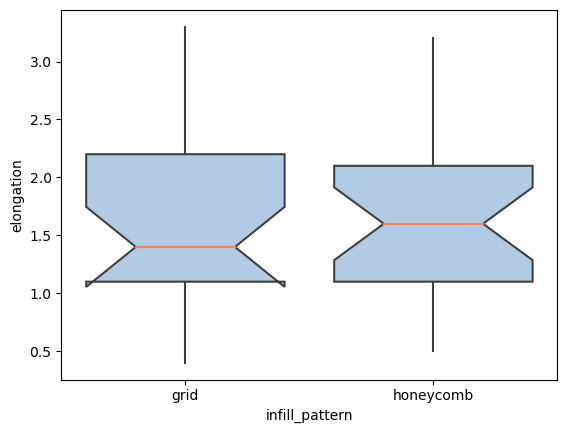

In [666]:
bp2 = sns.boxplot(data=df, x= 'infill_pattern', y='elongation', 
                  notch=True, showcaps=False, flierprops={"marker": "x"},
                  boxprops={"facecolor": (.4, .6, .8, .5)},
                  medianprops={"color": "coral"}
                 ) 

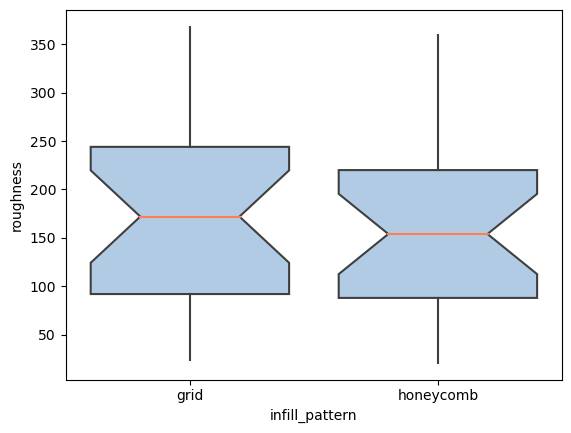

In [667]:
bp3 = sns.boxplot(data=df, x='infill_pattern', y='roughness', 
                  notch=True, showcaps=False, flierprops={"marker": "x"},
                  boxprops={"facecolor": (.4, .6, .8, .5)},
                  medianprops={"color": "coral"}
                 )

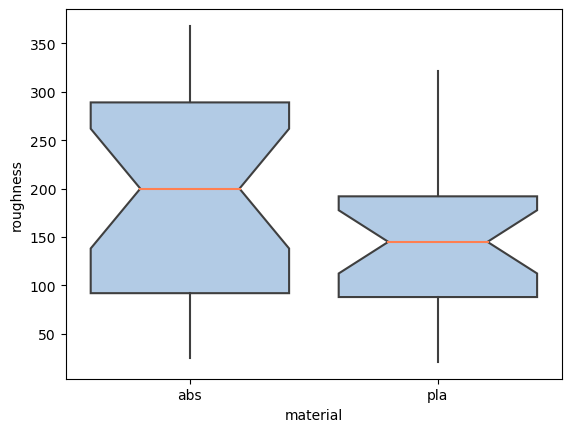

In [668]:
bp4 = sns.boxplot(data=df, x='material', y='roughness', 
                  notch=True, showcaps=False, flierprops={"marker": "x"},
                  boxprops={"facecolor": (.4, .6, .8, .5)},
                  medianprops={"color": "coral"}
                 )

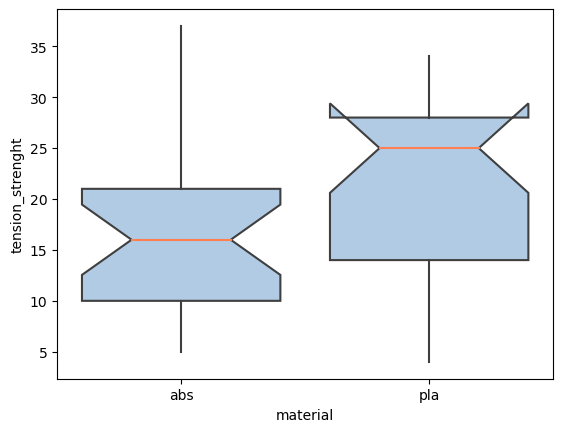

In [669]:
bp5 = sns.boxplot(data=df, x='material', y='tension_strenght', 
                  notch=True, showcaps=False, flierprops={"marker": "x"},
                  boxprops={"facecolor": (.4, .6, .8, .5)},
                  medianprops={"color": "coral"}
                 )

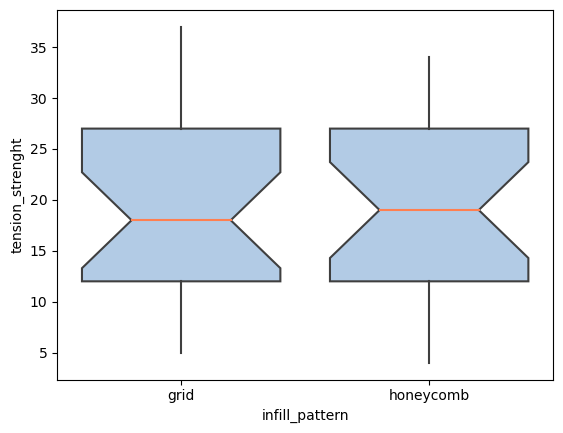

In [670]:
bp5 = sns.boxplot(data=df, x='infill_pattern', y='tension_strenght', 
                  notch=True, showcaps=False, flierprops={"marker": "x"},
                  boxprops={"facecolor": (.4, .6, .8, .5)},
                  medianprops={"color": "coral"}
                 )

<Axes: ylabel='Frequency'>

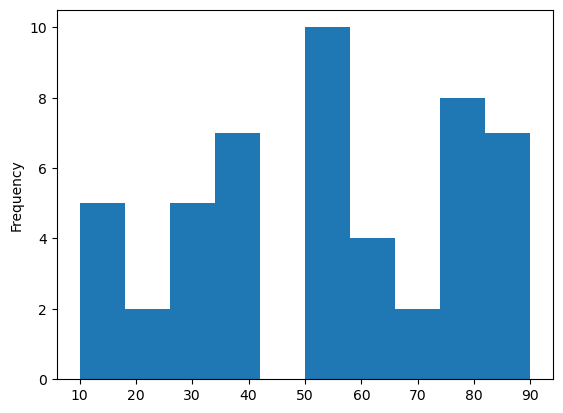

In [671]:
df['infill_density'].plot(kind='hist')